# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
import lut

--2020-10-13 17:14:00--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.128.133, 151.101.64.133, 151.101.192.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.128.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10330 (10K) [text/plain]
Saving to: 'lut.py'

     0K ..........                                            100% 2,96M=0,003s

2020-10-13 17:14:00 (2,96 MB/s) - 'lut.py' saved [10330/10330]



Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

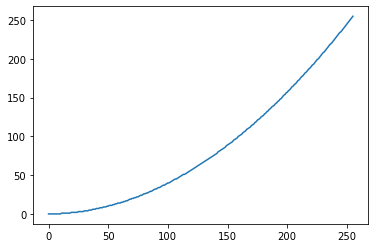

In [3]:
from matplotlib import pyplot as plt

plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

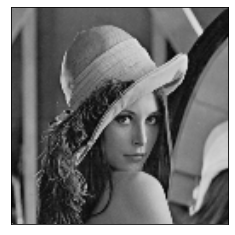

In [62]:
if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

# Read file from disk
I = cv2.imread('lena.bmp')


# Matplotlib display
plt.imshow(I)
plt.xticks([]), plt.yticks([])
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

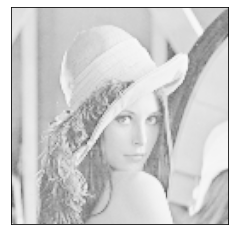

In [61]:
I2=cv2.LUT(I,lut.log)
plt.imshow(I2)
plt.xticks([]), plt.yticks([])
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [27]:
def LUT(Image,Tab):
    Image2=cv2.LUT(Image,lut.log);
    f, (ax1,ax2,ax3) = plt.subplots(1,3)
    ax1.set_title('wykres przekodowania')
    ax1.set_aspect('equal')
    ax1.plot(Tab)
    ax2.set_title('oryginalny')
    ax2.set_aspect('equal')
    ax2.imshow(Image)
    ax3.set_title('przekształcony')
    ax3.set_aspect('equal')
    ax3.imshow(Image2)

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

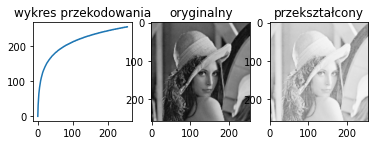

In [28]:
LUT(I,lut.log)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

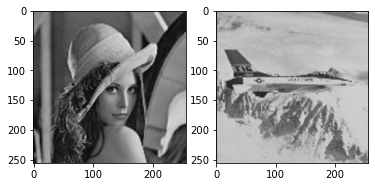

In [59]:
if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

# Read file from disk
Image1 = cv2.imread('lena.bmp')
Image2 = cv2.imread('jet.bmp')

# Matplotlib display
f, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(Image1)
ax2.imshow(Image2)

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

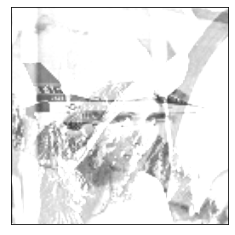

In [54]:
ImageAdd=cv2.add(Image1,Image2)
plt.imshow(ImageAdd)
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

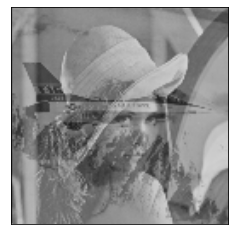

In [53]:
Image1_16=Image1.astype('uint16')
Image2_16=Image2.astype('uint16')

ImageAdd2=cv2.add(Image1_16,Image2_16)
ImageAdd2_8=(ImageAdd2/2).astype('uint8')
plt.imshow(ImageAdd2_8)
plt.xticks([]), plt.yticks([])
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

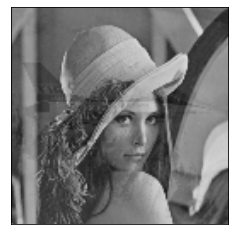

In [57]:
ImageAdd3 = cv2.addWeighted(Image1,0.8,Image2,0.2,0)
plt.imshow(ImageAdd3)
plt.xticks([]), plt.yticks([])
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

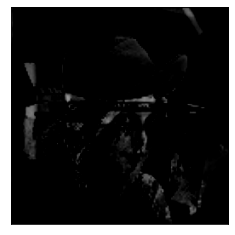

In [50]:
ImageSub=cv2.subtract(Image1,Image2)
plt.imshow(ImageSub)
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

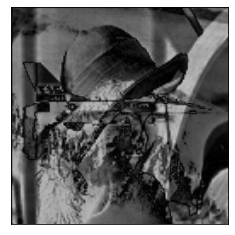

In [51]:
Image1_16=Image1.astype('int16')
Image2_16=Image2.astype('int16')

ImageSub2=cv2.subtract(Image1_16,Image2_16)

ImageSub2ABS=abs(ImageSub2)

plt.imshow(ImageSub2ABS)
plt.xticks([]), plt.yticks([])
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

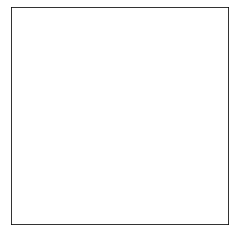

In [60]:
ImageMult = cv2.multiply(Image1, Image2)
plt.imshow(ImageMult)
plt.xticks([]), plt.yticks([])
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

--2020-10-13 18:12:43--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66614 (65K) [image/bmp]
Saving to: 'kolo.bmp'

     0K .......... .......... .......... .......... .......... 76% 1,20M 0s
    50K .......... .....                                      100% 1,32M=0,05s

2020-10-13 18:12:43 (1,22 MB/s) - 'kolo.bmp' saved [66614/66614]



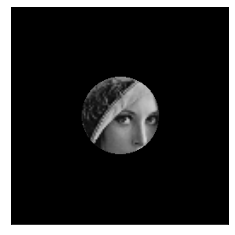

In [63]:
if not os.path.exists("kolo.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
        
mask = cv2.imread('kolo.bmp').astype('bool').astype('uint8')

ImageWithMask = cv2.multiply(Image1, mask)
plt.imshow(ImageWithMask)
plt.xticks([]), plt.yticks([])
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

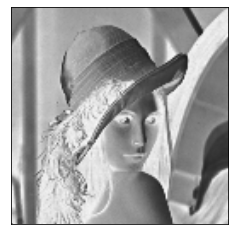

In [64]:
Negative = cv2.bitwise_not(Image1)
plt.imshow(Negative)
plt.xticks([]), plt.yticks([])
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

--2020-10-13 18:17:13--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.128.133, 151.101.192.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66614 (65K) [image/bmp]
Saving to: 'kwadrat.bmp'

     0K .......... .......... .......... .......... .......... 76%  916K 0s
    50K .......... .....                                      100% 5,08M=0,06s

2020-10-13 18:17:14 (1,11 MB/s) - 'kwadrat.bmp' saved [66614/66614]



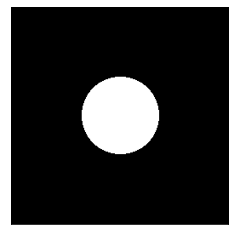

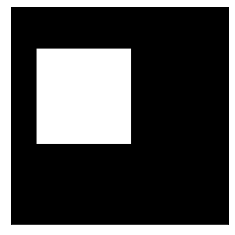

In [65]:
if not os.path.exists("kolo.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
if not os.path.exists("kwadrat.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp
        
Circle = cv2.imread('kolo.bmp')
Square = cv2.imread('kwadrat.bmp')

plt.imshow(Circle)
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(Square)
plt.xticks([]), plt.yticks([])
plt.show()
        

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

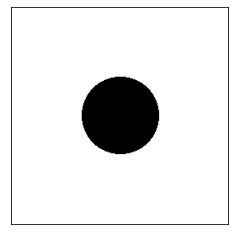

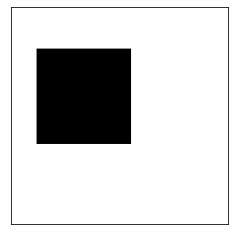

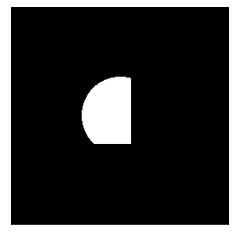

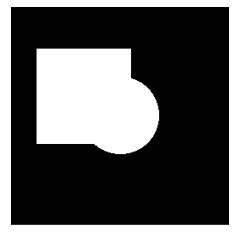

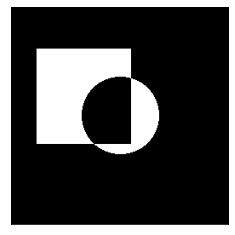

In [66]:
plt.imshow(cv2.bitwise_not(Circle))
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cv2.bitwise_not(Square))
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cv2.bitwise_and(Circle,Square))
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cv2.bitwise_or(Circle,Square))
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cv2.bitwise_xor(Circle,Square))
plt.xticks([]), plt.yticks([])
plt.show()


## Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

Text(0.5, 1.0, 'z wszystkich bitów')

<Figure size 432x288 with 0 Axes>

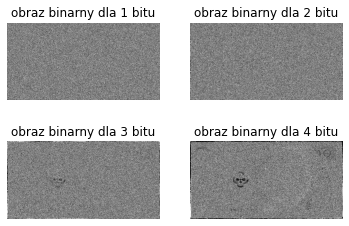

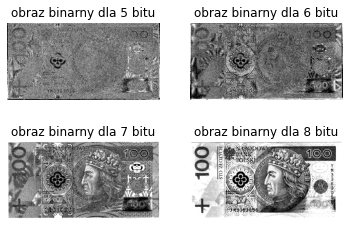

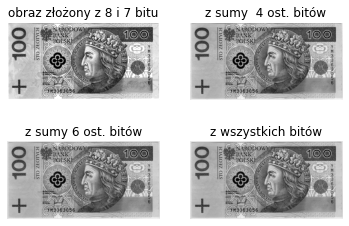

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("100zloty.jpg") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

image = cv2.imread('100zloty.jpg') 

imageToGray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.gray()

# 8|7|6|5|4|3|2|1
# ---------------------
# 0 0 0 0 0 0 0 1 = 1 => :2 => 0 0 0 0 0 0 0 0  %2 => 0
# 1 0 0 0 0 0 1 0 = 130 => :2  0 1 0 0 0 0 0 1 = 65  %2 => 1
# 1 1 0 0 0 0 0 0 = 192 

# dzielać przez 2 4 8... robimy przesunięcie bitowe, następnie dzieląc przez modulo otrzymujemy wartość (ostatniego) wybranego bitu który jest albo 0 albo 1

bit1= np.mod(imageToGray, 2);
bit2= np.mod(np.floor(imageToGray/2), 2);   
bit3= np.mod(np.floor(imageToGray/4), 2);
bit4= np.mod(np.floor(imageToGray/8), 2);
bit5= np.mod(np.floor(imageToGray/16), 2);
bit6= np.mod(np.floor(imageToGray/32), 2);
bit7= np.mod(np.floor(imageToGray/64), 2);
bit8= np.mod(np.floor(imageToGray/128), 2);


f, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2)
ax1.imshow(bit1)
ax1.axis('off')
ax1.set_title("obraz binarny dla 1 bitu")
ax2.imshow(bit2)
ax2.axis('off')
ax2.set_title("obraz binarny dla 2 bitu")
ax3.imshow(bit3)
ax3.axis('off')
ax3.set_title("obraz binarny dla 3 bitu")
ax4.imshow(bit4)
ax4.axis('off')
ax4.set_title("obraz binarny dla 4 bitu")
f, ([ax5,ax6],[ax7,ax8]) = plt.subplots(2,2)
ax5.imshow(bit5)
ax5.axis('off')
ax5.set_title("obraz binarny dla 5 bitu")
ax6.imshow(bit6)
ax6.axis('off')
ax6.set_title("obraz binarny dla 6 bitu")
ax7.imshow(bit7)
ax7.axis('off')
ax7.set_title("obraz binarny dla 7 bitu")
ax8.imshow(bit8)
ax8.axis('off')
ax8.set_title("obraz binarny dla 8 bitu")

# 255 => biały
# 0 => czarny 
# bardziej znaczące bity mają wiekszą wartość "liczbową" zatem w większym stopniu wpływają na obrazek
# ponieważ biały kolor to wartość 255 a czarny kolor 0 zatem im większą wartość dodamy tym większą "roznice" zobaczymy
# a zapewniają to bardziej znaczące bity
# dlatego w 1 obrazku w których wyciągamy pierwsze bity widzimy szarość i nic konkretnego, 
# natomiast w ostatnim obrazie pokazując bit który ma nawjwiększe znaczenie, obraz jest w dobrej jakości.

img_b_87 = (2 * bit8 + bit7)
img_b_8765 = (2 * (2 * (2 * bit8 + bit7) + bit6) + bit5)
img_b_876543 = (2 * (2 * (2 * (2 * (2 * bit8 + bit7) + bit6) + bit5) + bit4) + bit3)
img_b_ALL = (2 * (2 * (2 * (2 * (2 * (2 * (2 * bit8 + bit7) + bit6) + bit5) + bit4) + bit3) + bit2) + bit1)

#dodając coraz mniejsze bity obraz już znacząco się nie różni, jedynie staje się delikatnie lepszy.

f, ([bx1,bx2],[bx3,bx4]) = plt.subplots(2,2)

bx1.imshow(img_b_87)
bx1.axis('off')
bx1.set_title("obraz złożony z 8 i 7 bitu")
bx2.imshow(img_b_8765)
bx2.axis('off')
bx2.set_title("z sumy  4 ost. bitów")
bx3.imshow(img_b_876543)
bx3.axis('off')
bx3.set_title("z sumy 6 ost. bitów")
bx4.imshow(img_b_ALL)
bx4.axis('off')
bx4.set_title("z wszystkich bitów")

